In [1]:
import numpy as np
from numpy import pi as π
from numpy.fft import fft, ifft
from numpy.random import randn

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18

In [2]:
# Create a simple signal with two frequencies
dt = 0.001
t = np.arange(0, 1, dt)

# Sum of 2 frequencies
f_clean = np.sin(2*π * 50*t) + np.sin(2*π * 120*t)

# Add some Gaussian noise
f = f_clean + 2.5 * randn(len(f_clean))

In [3]:
# Compute the Fast Fourier Transform (FFT)
n = len(t)
f̂ = fft(f, n)                         # Compute the FFT
PSD = (f̂ * np.conj(f̂) / n).real       # Power spectrum (power per freq)
freq = (1 / (dt * n)) * np.arange(n)  # Create x-axis of frequencies in Hz
L = np.arange(1, n//2)                # Only plot the first half of freqs

In [4]:
# Use the PSD to filter out noise
indices = PSD > 100       # Find all freqs with large power
PSDclean = PSD * indices  # Zero out all others
f̂ = indices * f̂           # Zero out small Fourier coeffs. in Y
ffilt = ifft(f̂).real      # Inverse FFT for filtered time signal

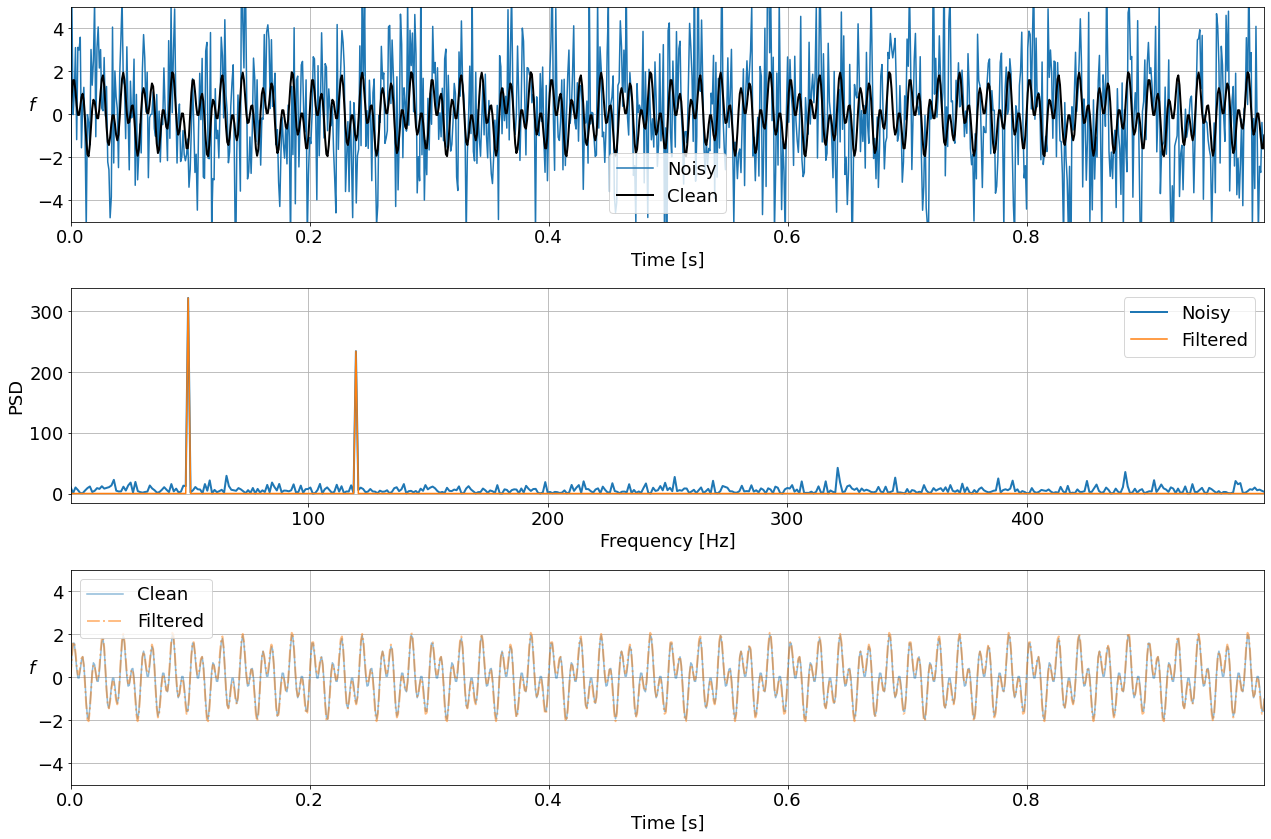

In [5]:
## Plots
# Figure 2.9

fig, axs = plt.subplots(3, 1, figsize=(18, 12))

axs[0].plot(t, f, linewidth=1.5, label='Noisy')
axs[0].plot(t, f_clean, color='k', linewidth=2, label='Clean')
axs[0].set_xlim(t[0], t[-1])
axs[0].set_ylim(-5, 5)
axs[0].set_xlabel('Time [s]')
axs[0].set_ylabel('$f$', rotation=0)

axs[0].legend()
axs[0].grid(True)

axs[1].plot(freq[L], PSD[L], linewidth=2, label='Noisy')
axs[1].plot(freq[L], PSDclean[L], linewidth=1.5, label='Filtered')
axs[1].set_xlim(freq[L[0]], freq[L[-1]])
axs[1].set_xlabel('Frequency [Hz]')
axs[1].set_ylabel('PSD')
axs[1].legend()
axs[1].grid(True)

axs[2].plot(t, f_clean, linewidth=1.5, alpha=0.5, label='Clean')
axs[2].plot(t, ffilt, linewidth=2, label='Filtered', linestyle='-.', alpha=0.5)
axs[2].set_xlim(t[0], t[-1])
axs[2].set_ylim(-5, 5)
axs[2].set_xlabel('Time [s]')
axs[2].set_ylabel('$f$', rotation=0)
axs[2].legend()
axs[2].grid(True)

plt.tight_layout();